# MUSIC DATASET - STINTSY S14 PROJECT (FLEXBOMB)
<a id='MUSIC_DATASET'></a>
This notebook is an exploratory data analysis on the Music Dataset. The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [List of Requirements](#List-of-Requirements) |
| [Reading the Dataset](#reading-the-dataset) |
| [Data Preprocessing and Cleaning](#Data-Preprocessing-and-Cleaning) |
| [Exploratory Data Analysis](#exploratory-data-analysis) |
| - [Question 1](#Question-1:-question) |

<br>

**`Authors`**: 
- Fausto, Lorane Bernadeth M. <br>
- Nadela, Cymon <br>
- Oliva, Irah <br>



\<indicate target task (i.e. classification or regression) here\>

## The Dataset

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

**`Music`** is a universal language, transcending cultures and time. It is a powerful art form that can evoke a wide range of emotions, from joy and excitement to sadness and reflection. Music can be used to express oneself, to connect with others, and to celebrate life. We are studying this dataset because it could be essential for studying music and developing new music technologies. In this notebook in particular, it will be used to train machine learning models to perform a variety of tasks. These models can then be used to create new products and services, such as personalized music streaming services and intelligent music assistants.

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 17,996 **rows** across 17 **columns**. Each row represents **1 song**, while columns represent **audio features**. The following are the columns in the dataset and their descriptions:

| Column Name | Description |
| --- | --- |
| **`Artist Name`** | Name of artist |
| **`Track Name`** | Name of song |
| **`Popularity`** | A value between 0 and 100, calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are |
| **`danceability`** | Describes how suitable a track is for dancing; 0.0 is least danceable and 1.0 is most danceable |
| **`energy`** | A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity |
| **`key`** | The key the track is in, integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class); -1 if no key was detected |
| **`loudness`** | The quality of a sound that is the primary psychological correlate of physical strength (amplitude), values are averaged across the entire track; in decibels (dB) |
| **`mode`** | Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived; 1 is Major and 0 is Minor |
| **`speechiness`** | The presence of spoken words in a track; >0.66 is probably made entirely of spoken words, 0.33-0.66 may contain both music and speech, <0.33 most likely represents music |
| **`acousticness`** | A confidence measure from 0.0 to 1.0 of whether the track is acoustic |
| **`instrumentalness`** | Predicts whether a track contains no vocals; >0.5 is intended to represent instrumental tracks |
| **`liveness`** | Detects the presence of an audience in the recording; >0.8 provides strong likelihood that the track is live |
| **`valence`** | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track; tracks with high valence sound more positive, and vice versa|
| **`tempo`** | The overall estimated tempo of a track in beats per minute (BPM) |
| **`duration_in min/ms`** | Duration in millisecond (ms) |
| **`time_signature`** | A notational convention to specify how many beats are in each bar |
| **`Class`** | corresponds to the genre of the track |

State a brief description of the dataset.

• Provide a description of the collection process executed to build the dataset. Discuss the
implications of the data collection method on the generated conclusions and insights.
Note that you may need to look at relevant sources related to the dataset to acquire
necessary information for this part of the project.

• Describe the structure of the dataset file. <br>
    o What does each row and column represent? <br>
    o How many instances are there in the dataset? <br>
    o How many features are there in the dataset? <br>
    o If the dataset is composed of different files that you will combine in the succeeding
steps, describe the structure and the contents of each file.

• Discuss the features in each dataset file. What does each feature represent? All features,
even those which are not used for the study, should be described to the reader. The
purpose of each feature in the dataset should be clear to the reader of the notebook
without having to go through an external link.

## List of Requirements
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

1. [Numpy](https://numpy.org/)
2. [Matplotlib](https://matplotlib.org/)
3. [CSV](https://docs.python.org/3/library/csv.html)

For this notebook, **numpy**, **matplotlib**, and **csv** must be imported.

In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import math 

plt.style.use('ggplot')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Reading the Dataset
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

Here we will load the dataset using `csv`. We use the [`reader`](https://docs.python.org/3/library/csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [3]:
music_df = pd.read_csv('music.csv')
music_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


The dataset is now loaded in the ???.

Show the contents of the...

## Exploratory Data Analysis Questions
-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

1. [**`Question 4`**](#question-4): Distribution of Features: Plot histograms or kernel density plots for Valence, Tempo, Liveness, Loudness, Acousticness, and Energy to understand their distributions.
2. [**`Question 5`**](#question-5): Class Distribution: Plot the distribution of the Class variable (target variable). Understand the balance between different classes.
3. [**`Question 6`**](#question-6): Relationship Between Features and Class: Use scatter plots or box plots to visualize the relationship between each feature and the target Class variable Identify any patterns or clusters that may exist.

## Data Preprocessing and Cleaning

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

First, we will organize the dataset columns to make it easier to understand. Also, some columns are renamed for shorter accessibility.

Before we begin exploring our data, it is important to understand what are the characteristics of our features to help us make smart decisions to our pre-processing steps. It identifies which pre-processing techniques can be done so that exploratory data analysis and data modeeling is most accurate. Most importantly, this is done to prevent inconsistencies that may cause problems or errors during analysis.

### Column Renaming 

First, we will organize the dataset columns to make it easier to understand. Also, some columns are renamed for shorter accessibility.

In [4]:
column_mapping = {
    'Artist Name': 'artist',
    'Track Name': 'track',
    'Popularity': 'popularity',
    'danceability': 'dance',
    'energy': 'energy',
    'key': 'key',
    'loudness': 'loudness',
    'mode': 'mode',
    'speechiness': 'speechiness',
    'acousticness': 'acousticness',
    'instrumentalness': 'instrumentalness',
    'liveness': 'liveness',
    'valence': 'valence',
    'tempo': 'tempo',
    'duration_in min/ms': 'duration',
    'time_signature': 'time_signature',
    'Class': 'class'
}

# Rename columns in the DataFrame
music_df.rename(columns=column_mapping, inplace=True)
print(music_df.columns)

Index(['artist', 'track', 'popularity', 'dance', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'time_signature', 'class'],
      dtype='object')


### Duplicates

We then check if there are any duplicated data in the dataset. We do this by calling the ``pandas.DataFrame.duplicated`` function. The function checks and returns the duplicated values.

In [5]:
numDuplicates = music_df.duplicated().sum()

print(f"Number of duplicates in the dataset: {numDuplicates}")

# Display duplicated rows
duplicated_rows_data = music_df[music_df.duplicated()]
print("Duplicated rows:")
print(duplicated_rows_data)

Number of duplicates in the dataset: 0
Duplicated rows:
Empty DataFrame
Columns: [artist, track, popularity, dance, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, time_signature, class]
Index: []


As displayed above there are **``0 duplicates``** in the dataset. 

### Null Values

Then, check which columns have **NaN or Null** values and **count** how many null values each column has.

artist: 0
track: 0
popularity: 428
dance: 0
energy: 0
key: 2014
loudness: 0
mode: 0
speechiness: 0
acousticness: 0
instrumentalness: 4377
liveness: 0
valence: 0
tempo: 0
duration: 0
time_signature: 0
class: 0


/var/folders/05/1l_2qxk974968mvy8bljd1540000gn/T/ipykernel_6179/1081200260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')


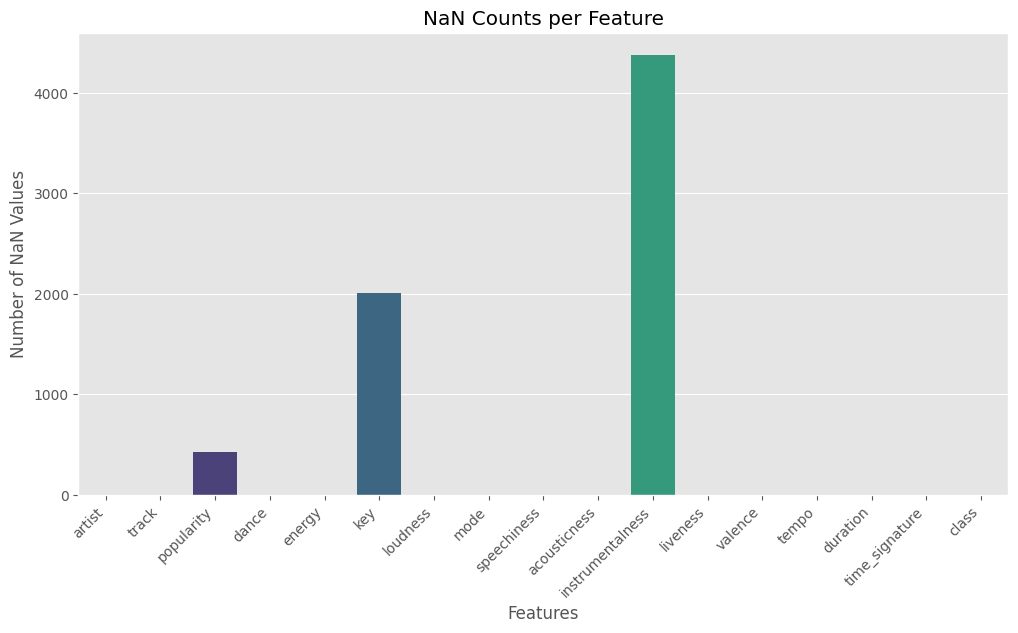

In [6]:
# show nan_count per variable
nan_counts = music_df.isna().sum()
for feature, nan_count in nan_counts.items():
    print(f"{feature}: {nan_count}")

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')
plt.title('NaN Counts per Feature')
plt.xlabel('Features')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

We can observe here that `popularity`, `key`, and `instrumentalness` has a high count of NaN values. We can use imputation to replace the NaN values with a measure the mean of the column for the non-categorical features. As for categorical features, we will drop the rows as shown below. We will use `pandas.DataFrame.fillna` and `pandas.DataFrame.mean` for our regression values while `pandas.DataFrame.dropna` to drop rows with null categorical values.

In [7]:
# Fill NaN for numerical features with mean
numerical_features = ['popularity', 'dance', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
music_df[numerical_features] = music_df[numerical_features].fillna(music_df[numerical_features].mean())

# Fill NaN for categorical features with a specific value (e.g., 'Unknown')
categorical_features = ['artist', 'track', 'key', 'mode', 'time_signature', 'class']
music_df_cleaned = music_df.dropna(subset=categorical_features)

# Display NaN counts per feature
nan_counts = music_df.isna().sum()
for feature, nan_count in nan_counts.items():
    print(f"{feature}: {nan_count}")


artist: 0
track: 0
popularity: 0
dance: 0
energy: 0
key: 2014
loudness: 0
mode: 0
speechiness: 0
acousticness: 0
instrumentalness: 0
liveness: 0
valence: 0
tempo: 0
duration: 0
time_signature: 0
class: 0


Now, let's create a graph of the amount of null data in each column for better visualization. As shown below, we can see that all of the columns now have 0 NaN values after performing imputation and dropping of rows. 

/var/folders/05/1l_2qxk974968mvy8bljd1540000gn/T/ipykernel_6179/1096263443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_data.columns, y=null_data.sum(), palette='pastel')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'artist'),
  Text(1, 0, 'track'),
  Text(2, 0, 'popularity'),
  Text(3, 0, 'dance'),
  Text(4, 0, 'energy'),
  Text(5, 0, 'key'),
  Text(6, 0, 'loudness'),
  Text(7, 0, 'mode'),
  Text(8, 0, 'speechiness'),
  Text(9, 0, 'acousticness'),
  Text(10, 0, 'instrumentalness'),
  Text(11, 0, 'liveness'),
  Text(12, 0, 'valence'),
  Text(13, 0, 'tempo'),
  Text(14, 0, 'duration'),
  Text(15, 0, 'time_signature'),
  Text(16, 0, 'class')])

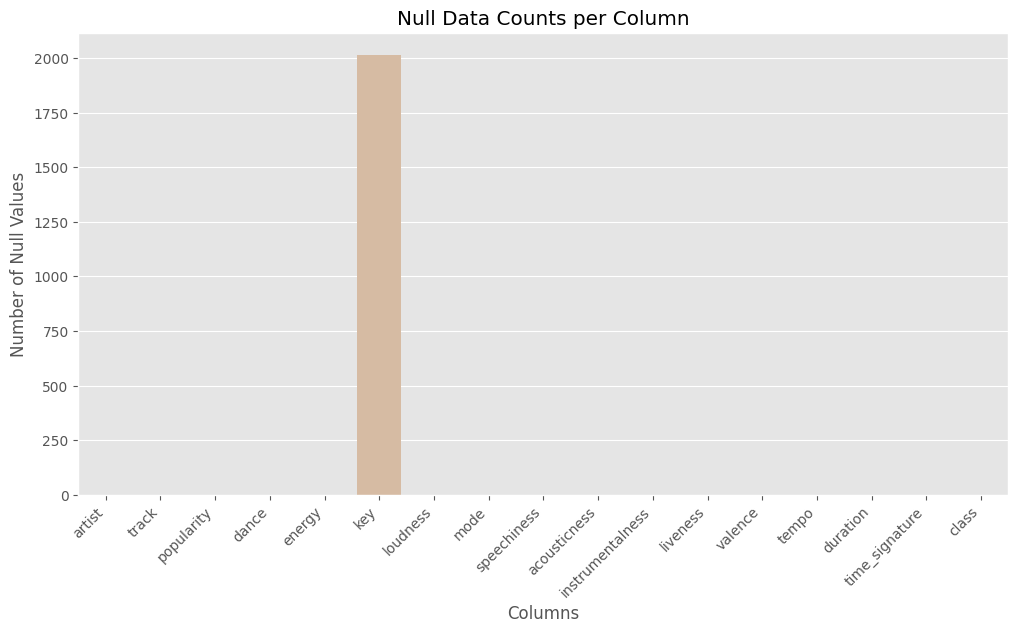

In [8]:
# Check for null data in each column
null_data = music_df.isnull()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=null_data.columns, y=null_data.sum(), palette='pastel')
plt.title('Null Data Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  

In [9]:
music_df = music_df.dropna(subset=['key'])

/var/folders/05/1l_2qxk974968mvy8bljd1540000gn/T/ipykernel_6179/1096263443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_data.columns, y=null_data.sum(), palette='pastel')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'artist'),
  Text(1, 0, 'track'),
  Text(2, 0, 'popularity'),
  Text(3, 0, 'dance'),
  Text(4, 0, 'energy'),
  Text(5, 0, 'key'),
  Text(6, 0, 'loudness'),
  Text(7, 0, 'mode'),
  Text(8, 0, 'speechiness'),
  Text(9, 0, 'acousticness'),
  Text(10, 0, 'instrumentalness'),
  Text(11, 0, 'liveness'),
  Text(12, 0, 'valence'),
  Text(13, 0, 'tempo'),
  Text(14, 0, 'duration'),
  Text(15, 0, 'time_signature'),
  Text(16, 0, 'class')])

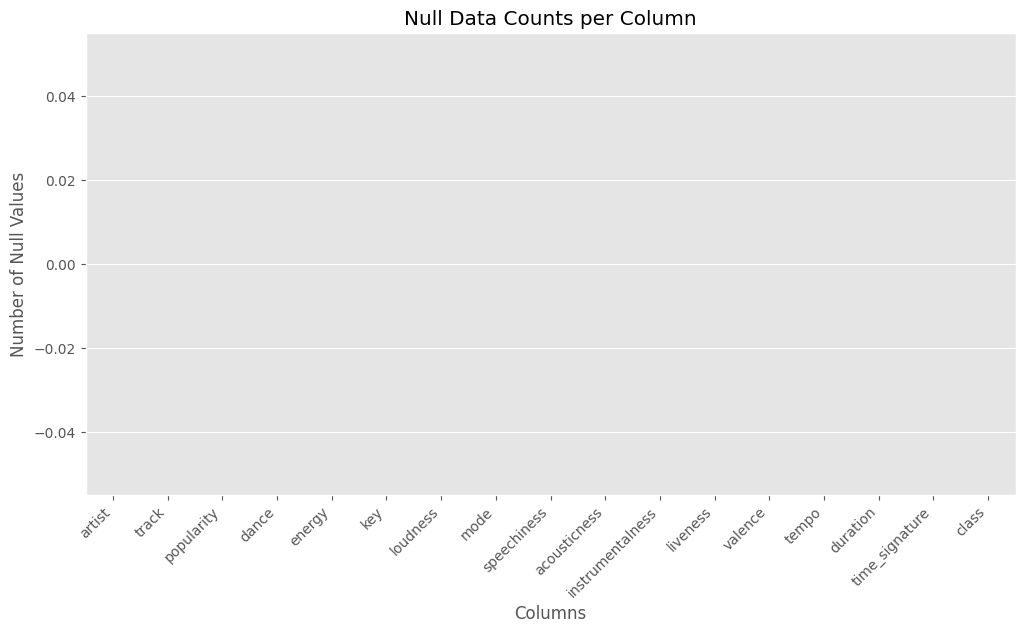

In [10]:
# Check for null data in each column
null_data = music_df.isnull()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=null_data.columns, y=null_data.sum(), palette='pastel')
plt.title('Null Data Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')  

### Outliers

Descriptive statistics provide a comprehensive overview of the numerical characteristics of each feature, offering insights into their central tendency (mean, median), dispersion (standard deviation), and range (min, max). Additionally, the identification of outliers is crucial to understanding potential anomalies that may influence the distribution and subsequently impact the modeling process.

First, let's use `pandas.DataFrame.describe` to describe our data.

In [11]:
music_df.describe()

,popularity,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,class
count,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000,1.598200e+04,15982.000000,15982.000000
mean,44.521710,0.543770,0.665670,5.952447,-7.883184,0.618258,0.081057,0.245077,0.178628,0.195403,0.484868,122.596752,2.013123e+05,3.925917,6.697722
std,17.147453,0.166341,0.234387,3.196854,4.025947,0.485829,0.084642,0.310250,0.264536,0.157204,0.239968,29.533995,1.116742e+05,0.358881,3.197176
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.512000,3.000000,-9.495750,0.000000,0.035000,0.003960,0.000310,0.097500,0.295000,99.492250,1.669950e+05,4.000000,5.000000
50%,44.000000,0.545000,0.702500,6.000000,-7.003500,1.000000,0.048150,0.077950,0.053300,0.129000,0.480000,120.047500,2.096230e+05,4.000000,8.000000
75%,56.000000,0.660000,0.863000,9.000000,-5.187000,1.000000,0.085300,0.430000,0.177562,0.258000,0.670000,141.968750,2.527960e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


We can observe here that some of the features namely, `energy`, `acousticness`, and `instrumentalness` have a min value of `0.000020`,`0.000000`, and `0.000001` respectively. We will eliminate instances with such small values in our dataset in an effort to reduce skewness that is heavily close to 0. However, this may significantly affect the size of our because these cover around 25% of our current size. Still, we opt to provide a higher accuracy even on a smaller dataset. 

In [12]:
music_df_filtered = music_df[(music_df['energy'] >= 0.01) & (music_df['acousticness'] >= 0.01) & (music_df['instrumentalness'] >= 0.01)]
music_df_filtered.describe()

,popularity,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,class
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6.512000e+03,6512.000000,6512.000000
mean,44.364781,0.574017,0.573449,5.953163,-9.119262,0.607647,0.086679,0.369399,0.294858,0.185302,0.489571,119.426625,1.831779e+05,3.918458,6.323096
std,18.021876,0.167165,0.233630,3.195535,4.680534,0.488312,0.100111,0.328064,0.277147,0.151468,0.247956,29.453603,1.267383e+05,0.385520,3.114026
min,1.000000,0.064400,0.010500,1.000000,-34.825000,0.000000,0.023000,0.010000,0.010000,0.021900,0.021500,30.557000,5.339167e-01,1.000000,0.000000
25%,33.000000,0.469000,0.423000,3.000000,-10.903000,0.000000,0.034200,0.069500,0.177562,0.098300,0.292000,96.036250,1.378228e+05,4.000000,5.000000
50%,44.000000,0.582000,0.606000,6.000000,-7.977500,1.000000,0.044800,0.257000,0.177562,0.122000,0.487000,117.499500,1.956075e+05,4.000000,6.000000
75%,56.000000,0.691000,0.752000,9.000000,-5.998000,1.000000,0.081100,0.651000,0.309000,0.222000,0.684000,139.817250,2.429235e+05,4.000000,9.000000
max,100.000000,0.980000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,216.091000,1.477187e+06,5.000000,10.000000


With this, we can use Boxplots from `seaborn` to identify possible outliers for the **numerical/continuous features**.  

In [13]:
def display_boxplot(data, numerical_features):
    numeric_features = data[numerical_features].columns

    num_features = len(numeric_features)
    num_cols = 2  # You can adjust the number of columns as needed
    num_rows = math.ceil(num_features / num_cols)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    fig.suptitle('Boxplots of Numeric Features', y=1.02)

    for idx, feature in enumerate(numeric_features):
        ax = axes[idx // 2, idx % 2]
        sns.boxplot(x=data[feature], ax=ax)
        ax.set_title(f'Boxplot of {feature}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

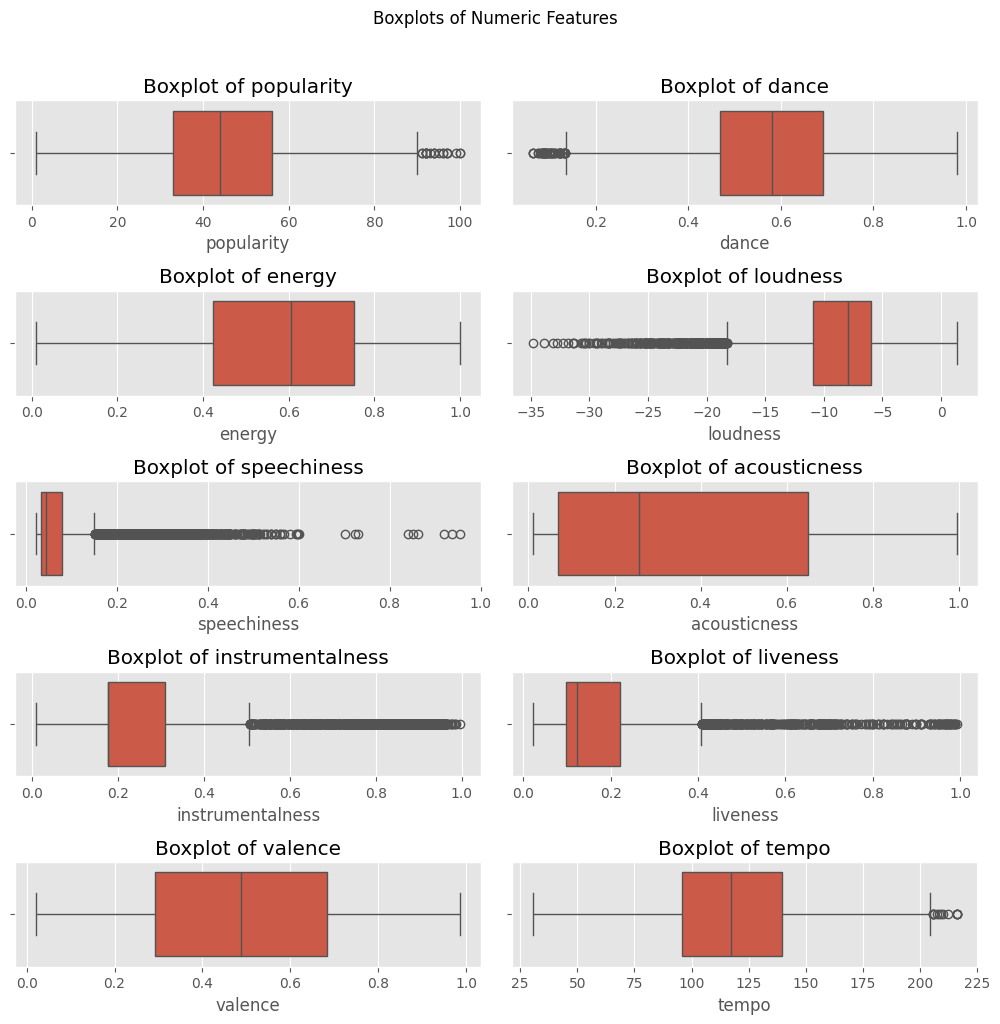

In [14]:
display_boxplot(music_df_filtered, numerical_features)

We can observe here that some of the features namely, `popularity`, `dance`, `loudness`, `speechiness`, `instrumentalness`, `liveness`, and `tempo` have an outstanding number of outliers way past the whiskers of the boxplots.

We can use `Interquartile Range` to remove outliers. This technique sets up a boundary outside Quartile 1 (Q1) and Quartile 3 (Q3). To do this, a multiplier of `1.5` is used to the data of the IQR, and the result is subtracted to Q1, while is added to Q3. Any instances in the data that are more than these boundaries are considered as outliers. (3.2 - Identifying Outliers: IQR Method | STAT 200, n.d.).

Using this will remove all the instances that have values below 25% and above 75% of the dataset based on two columns `loudness` and `tempo`.  


We first get the quantile values based on these features.

In [15]:
outlier_features = ['popularity', 'dance', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']

# Calculate the IQR for each feature
Q1 = music_df_filtered[outlier_features].quantile(0.25)
Q3 = music_df_filtered[outlier_features].quantile(0.75)

print("Quantile 1: ", Q1)
print("Quantile 1: ", Q3)

Quantile 1:  popularity          33.000000
dance                0.469000
loudness           -10.903000
speechiness          0.034200
instrumentalness     0.177562
liveness             0.098300
tempo               96.036250
Name: 0.25, dtype: float64
Quantile 1:  popularity           56.00000
dance                 0.69100
loudness             -5.99800
speechiness           0.08110
instrumentalness      0.30900
liveness              0.22200
tempo               139.81725
Name: 0.75, dtype: float64


Then we subtract Q3 from Q1.

In [16]:
IQR = Q3 - Q1
print(IQR)

popularity          23.000000
dance                0.222000
loudness             4.905000
speechiness          0.046900
instrumentalness     0.131438
liveness             0.123700
tempo               43.781000
dtype: float64


As stated, we will use the multiplier `1.5`, store this on variable `multiplier`.

In [17]:
# Define a multiplier for IQR (e.g., 1.5)
multiplier = 1.5

Now, we can check for outliers using the logic of Interquartile Range.

In [18]:
# Identify outliers based on the IQR
outliers = (music_df_filtered[outlier_features] < (Q1 - multiplier * IQR)) | (music_df_filtered[outlier_features] > (Q3 + multiplier * IQR))

With the outliers determined, we can now filter our dataset accordingly. Store the filtered dataset in `music_no_outliers_df`

In [19]:
# Create a DataFrame without outliers
music_no_outliers_df = music_df_filtered[~outliers.any(axis=1)]

# Display information about removed outliers
print("Number of rows before removing outliers:", music_df.shape[0])
print("Number of rows after removing outliers:", music_no_outliers_df.shape[0])

Number of rows before removing outliers: 15982
Number of rows after removing outliers: 3893


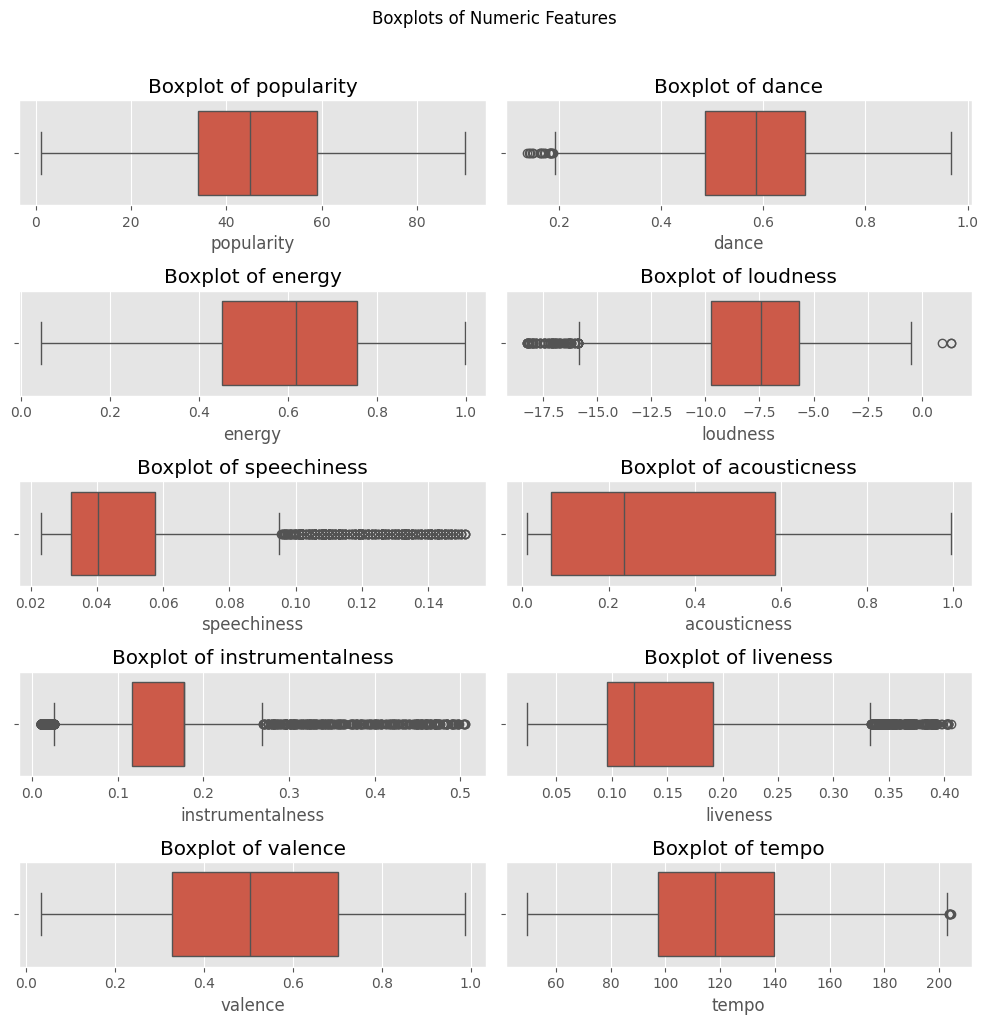

In [20]:
display_boxplot(music_no_outliers_df, numerical_features)

### Data Normalization



In [21]:
def display_histogram(data, columns):
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

    # Flatten the axes for easier iteration
    axes = axes.flatten()

    # Create histograms for each column using a for loop
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'{column} distribution')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

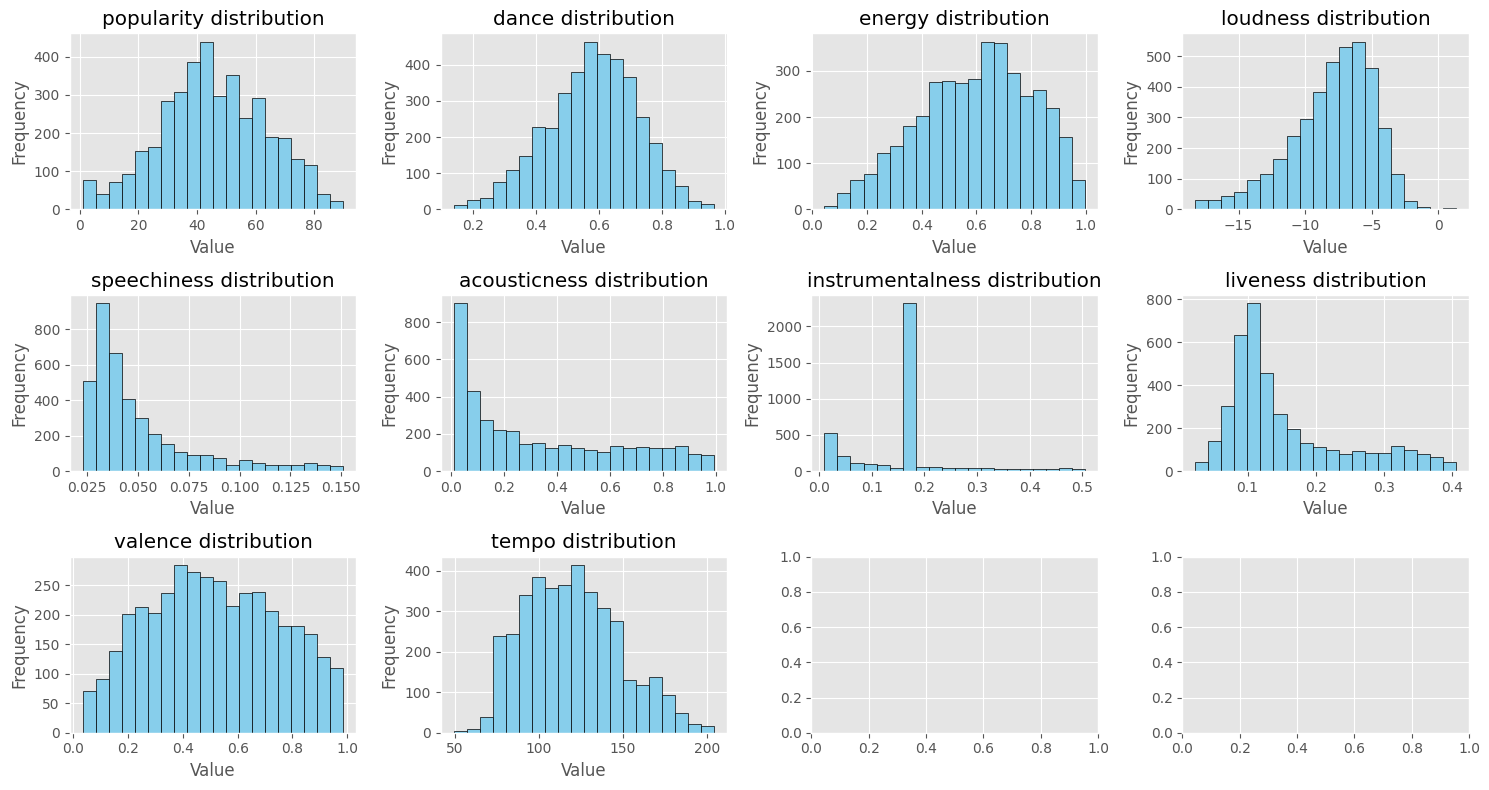

In [22]:
display_histogram(music_no_outliers_df, ['popularity', 'dance', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])

The distributions above tells that each of the features are either positively or negatively skewed. 

In [23]:
music_no_outliers_normalized = music_no_outliers_df.copy()
music_no_outliers_normalized

,artist,track,popularity,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,0.177562,0.0849,0.8990,134.071,234596.000000,4,5
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.0212,0.177562,0.1220,0.5690,107.033,173968.000000,4,5
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.0614,0.177562,0.2530,0.8330,128.043,164093.000000,4,9
12,Eyal Golan,◊ß◊®◊ï◊ë◊î ◊ê◊ú◊ô◊ô,34.0,0.585,0.381,1.0,-7.622,0,0.0463,0.4350,0.177562,0.1260,0.3220,143.876,206875.000000,4,9
14,Buffalo Springfield,For What It's Worth,76.0,0.653,0.519,2.0,-10.164,1,0.0497,0.4060,0.020900,0.1010,0.8220,98.883,153693.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17963,Katastro,The Way I Feel,44.0,0.740,0.606,1.0,-6.821,0,0.0390,0.0497,0.177562,0.1860,0.4930,95.024,157640.000000,4,10
17965,Avraham Tal,◊©◊ë◊ï◊¢ ◊ò◊ï◊ë,53.0,0.697,0.777,7.0,-3.472,0,0.0834,0.0107,0.177562,0.0970,0.5550,103.996,151442.000000,4,9
17966,UPSAHL,Young Life Crisis,51.0,0.598,0.790,1.0,-4.490,1,0.0711,0.1330,0.177562,0.1190,0.7160,144.069,156987.000000,4,10
17974,Seventeen Again (feat. Novo Amor),"Charli Adams, Novo Amor",48.0,0.338,0.282,3.0,-10.902,1,0.0293,0.6400,0.177562,0.1110,0.0952,141.468,3.408667,3,0


In [24]:
for column in ['energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']:
    # Determine the range
    min_val = np.min(music_no_outliers_df[column])
    max_val = np.max(music_no_outliers_df[column])

    # Apply Min-Max Normalization
    normalized_data = (music_no_outliers_df[column] - min_val) / (max_val - min_val)
    music_no_outliers_normalized[column] = normalized_data

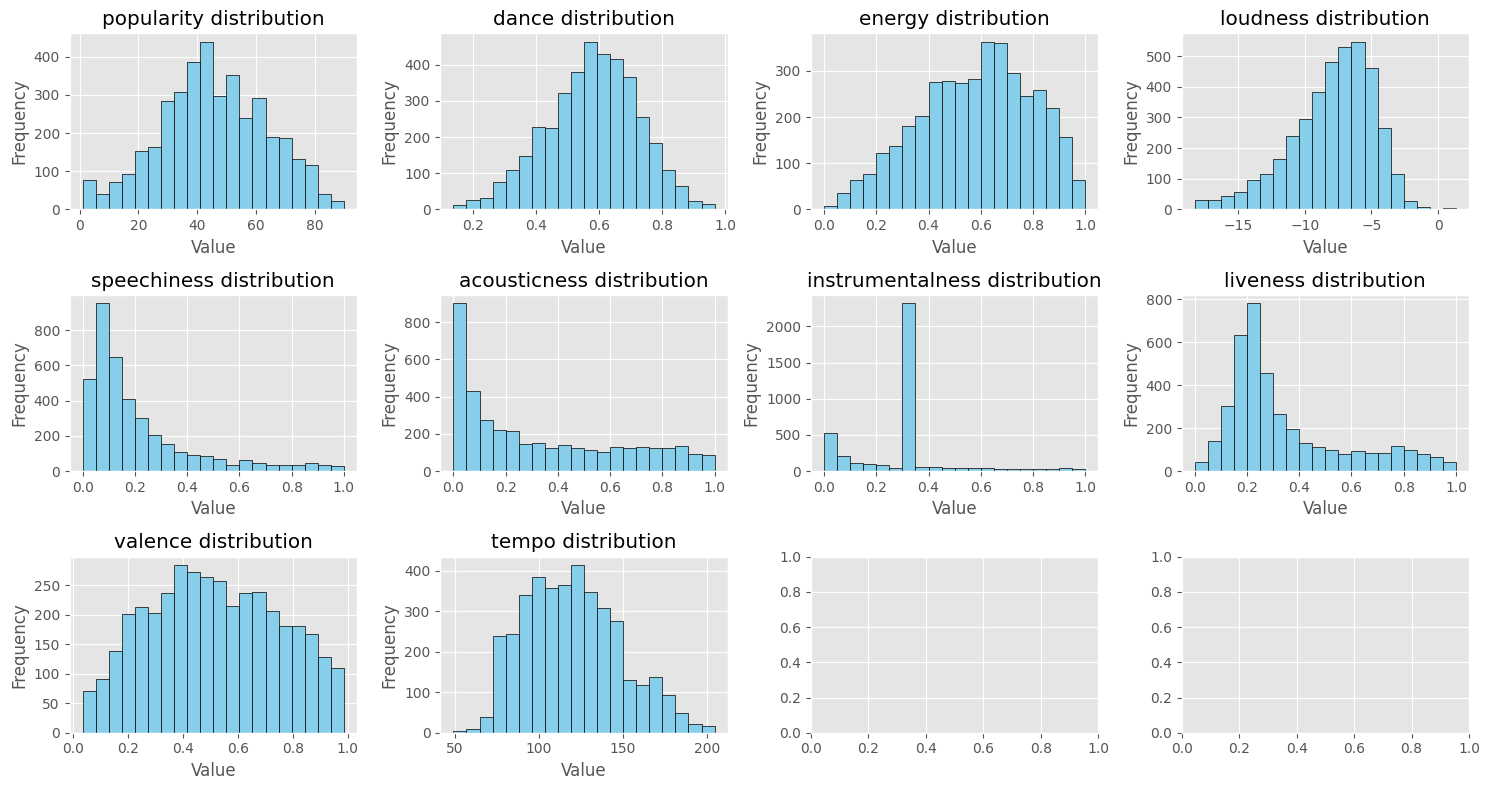

In [25]:
display_histogram(music_no_outliers_normalized, numerical_features)

In [26]:
music_no_outliers_normalized.describe()

,popularity,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,class
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3.893000e+03,3893.000000,3893.000000
mean,45.633505,0.578869,0.581650,5.924994,-7.953694,0.633702,0.213914,0.331357,0.305099,0.344615,0.514499,119.976164,1.842877e+05,3.928333,6.572052
std,18.178909,0.145266,0.213760,3.202328,3.120760,0.481854,0.210204,0.304540,0.186862,0.229290,0.236234,28.570440,1.133862e+05,0.342668,3.380505
min,1.000000,0.137000,0.000000,1.000000,-18.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033700,49.320000,9.793333e-01,1.000000,0.000000
25%,34.000000,0.485000,0.426952,3.000000,-9.750000,0.000000,0.071875,0.056142,0.216162,0.189705,0.329000,97.446000,1.486400e+05,4.000000,4.000000
50%,45.000000,0.585000,0.602225,6.000000,-7.453000,1.000000,0.135937,0.229442,0.338509,0.252678,0.505000,118.194000,1.997570e+05,4.000000,8.000000
75%,59.000000,0.682000,0.746012,9.000000,-5.678000,1.000000,0.269531,0.585787,0.338509,0.438202,0.701000,139.790000,2.406610e+05,4.000000,9.000000
max,90.000000,0.967000,1.000000,11.000000,1.342000,1.000000,1.000000,1.000000,1.000000,1.000000,0.986000,204.312000,1.244613e+06,5.000000,10.000000


Now that we have cleaned all columns that will be used for this notebook. We can now begin the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#music-dataset---stintsy-s14-project-(flexbomb)) --

### Question 1: Question

Correlation Matrix:
                  popularity     dance    energy       key  loudness  \
popularity          1.000000  0.166114  0.049131  0.005829  0.126177   
dance               0.166114  1.000000 -0.100549  0.006702  0.057462   
energy              0.049131 -0.100549  1.000000  0.015934  0.763602   
key                 0.005829  0.006702  0.015934  1.000000  0.002660   
loudness            0.126177  0.057462  0.763602  0.002660  1.000000   
mode                0.014764 -0.067808 -0.037174 -0.112452 -0.037236   
speechiness         0.034099  0.202338  0.126514  0.001822  0.096831   
acousticness       -0.126211  0.013186 -0.745496 -0.009112 -0.607759   
instrumentalness   -0.140125 -0.175473 -0.154036  0.001240 -0.312461   
liveness           -0.073541 -0.105353  0.192635  0.015125  0.107329   
valence             0.054904  0.445591  0.211956  0.031744  0.173695   
tempo              -0.004185 -0.184380  0.205064  0.013965  0.159904   
duration           -0.027550 -0.122748  0.24

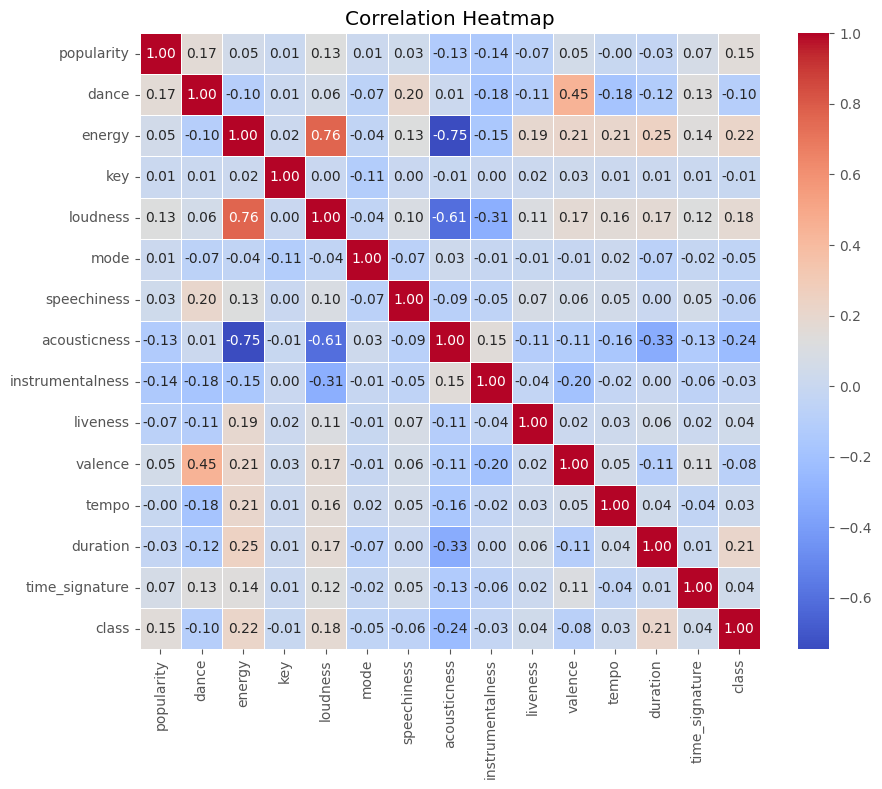

In [27]:
#correlation_matrix = music_df[selected_features + [target_variable]].corr()
correlation_matrix = music_df.select_dtypes(include='number').corr()

# Display correlation coefficients
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### EDA Question 1 Results
This shows the relationship between 13 different audio features, including popularity, dance, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, time signature, and class.

The correlation values range from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

**Positive correlations**

1. `Popularity` is positively correlated with `dance`, `energy`, and `loudness`. This suggests that more popular songs tend to be more danceable, energetic, and louder.
2. `Dance` is positively correlated with `energy`, `loudness`, and `valence`. This suggests that danceable songs tend to be more energetic, louder, and more positive.
3. `Energy` is positively correlated with `loudness` and `valence`. This suggests that energetic songs tend to be louder and more positive.
4. `Speechiness` is positively correlated with `tempo`. This suggests that songs with more speech tend to have a faster tempo.
5. `Acousticness` is positively correlated with `time signature`. This suggests that acoustic songs tend to have a more regular time signature.

**Negative correlations**

1. `Popularity` is negatively correlated with `acousticness`. This suggests that more popular songs tend to be less acoustic.
2. `Dance` is negatively correlated with `speechiness` and `acousticness`. This suggests that danceable songs tend to have less speech and are less acoustic.
3. `Energy` is negatively correlated with `acousticness`. This suggests that energetic songs tend to be less acoustic.
4. `Instrumentalness` is negatively correlated with `valence`. This suggests that instrumental songs tend to be less positive.
5. `Liveness` is negatively correlated with `acousticness`. This suggests that livelier songs tend to be less acoustic.
6. `Tempo` is negatively correlated with `acousticness` and `duration`. This suggests that faster songs tend to be less acoustic and shorter.
7. `Duration` is negatively correlated with `class`. This suggests that longer songs are less likely to be classified as a particular genre.

Overall, the correlation heatmap provides insights into the relationships between different audio features. For example, we can see that more popular songs tend to be more danceable, energetic, and louder, while acoustic songs tend to be less popular, less danceable, and more mellow.

To also gain insights for our Machine Learning, we provided insights for `mode` being our target variable.

1. `Mode` is positively correlated with `key`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, and `duration`. This means that songs in **major mode** tend to be *more popular, danceable, energetic, loud, speechy, acoustic, instrumental, live, positive, fast, and long.*

2. `Mode` is negatively correlated with `popularity`, `danceability`, `energy`, and `valence`. This means that songs in **minor mode** tend to be *less popular, danceable, energetic, and positive.*

In [28]:
from sklearn.model_selection import train_test_split

X = music_no_outliers_normalized[numerical_features]
y = music_no_outliers_normalized['mode']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (2725, 10)
Training labels shape:  (2725,)
Test data shape:  (1168, 10)
Test labels shape:  (1168,)


## Model Training
Logistic Regression 
Let's instantiate an `SGDClassifier` object and set the following hyperparameters:
- Loss function: 'log_loss'
- Initial learning rate: 0.001
- Maximum iterations: 200
- Learning rate: 'constant'
- Random state: 1
- Verbose: 1


In [29]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log_loss', 
                      eta0=0.001, 
                      max_iter=200, 
                      learning_rate='constant', 
                      random_state=1, 
                      verbose=1)

model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.08, NNZs: 10, Bias: -0.006140, T: 2725, Avg. loss: 4.006654
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.18, NNZs: 10, Bias: -0.008943, T: 5450, Avg. loss: 4.027901
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 10, Bias: -0.020093, T: 8175, Avg. loss: 4.177424
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 10, Bias: -0.033287, T: 10900, Avg. loss: 3.966782
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.26, NNZs: 10, Bias: -0.055697, T: 13625, Avg. loss: 3.931243
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.30, NNZs: 10, Bias: -0.067950, T: 16350, Avg. loss: 4.089984
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.29, NNZs: 10, Bias: -0.076510, T: 19075, Avg. loss: 3.994700
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.39, NNZs: 10, Bias: -0.077811, T: 21800, Avg. loss: 3.885976
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.34, NNZs: 10, Bias: -0.091589, T: 24525, Avg. loss: 3.919872
Tot

SGDClassifier(eta0=0.001, learning_rate='constant', loss='log_loss',
              max_iter=200, random_state=1, verbose=1)

Let's predict the training data first

In [30]:
predictions = model.predict(X_train)
num_correct = np.count_nonzero((y_train==predictions))
print(num_correct)
accuracy = num_correct/len(y_train)
print("Accuracy :", accuracy * 100)


1110
Accuracy : 40.73394495412844


Then, compare the results with test data.

In [31]:
predictions = model.predict(X_test)
num_correct = np.count_nonzero((y_test==predictions))
print(num_correct)
accuracy = num_correct/len(y_test)
print("Accuracy :", accuracy * 100)

507
Accuracy : 43.40753424657534


In [32]:
prob = pd.DataFrame(model.predict_proba(X_test), columns=['y = 0', 'y = 1'])
prob['actual'] = y_test.values
prob

,y = 0,y = 1,actual
0,0.974929,0.025071,1
1,0.742855,0.257145,0
2,0.157266,0.842734,1
3,0.753759,0.246241,0
4,0.500066,0.499934,1
...,...,...,...
1163,0.957763,0.042237,1
1164,0.976947,0.023053,1
1165,0.999549,0.000451,0
1166,0.917705,0.082295,0


### Hyperparameter Tuning

To tune hyperparameters for our `SGDClassifier`, we can used  grid search. Scikit-learn provides the `GridSearchCV` classes for this purpose.

Set our Pipeline that includes a standard scaler and the `SGDClassifier`
We can set the parameter grid as a parameter for our `GridSearchCV` as such: 
> 'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0] <br>
> 'classifier__max_iter': [100, 200, 300]<br>
> 'classifier__eta0': [0.001, 0.01, 0.1]<br>

We can Instantiate the `GridSearchCV` with our made pipeline, param_grid, cross validation = 5, scoring = accuracy, and verbose = 1


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline with a standard scaler and SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log_loss', random_state=1, verbose=1))
])

# Define the hyperparameters 
param_grid = {
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'classifier__max_iter': [100, 200, 300],
    'classifier__eta0': [0.001, 0.01, 0.1],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy_test = best_model.score(X_test, y_test)

print(f"Best Parameters: {best_params}")
print(f"Test Accuracy with Best Model: {accuracy_test}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
-- Epoch 1
Norm: 11.01, NNZs: 10, Bias: 17.090986, T: 2180, Avg. loss: 12.984201
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13.24, NNZs: 10, Bias: 4.081711, T: 4360, Avg. loss: 5.333901
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.00, NNZs: 10, Bias: 1.709046, T: 6540, Avg. loss: 3.780793
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 10, Bias: 0.502987, T: 8720, Avg. loss: 2.736271
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 10, Bias: 0.106891, T: 10900, Avg. loss: 2.170213
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.08, NNZs: 10, Bias: 1.334450, T: 13080, Avg. loss: 1.868216
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.35, NNZs: 10, Bias: 2.580923, T: 15260, Avg. loss: 1.600671
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.89, NNZs: 10, Bias: 1.593264, T: 17440, Avg. loss: 1.432335
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 3.32, NNZ

After performing the grid search, we can now locate the best parameters for our Logistic regression.

- Best Parameters: {'classifier__alpha': 0.01, 'classifier__eta0': 0.001, 'classifier__max_iter': 100}
- Test Accuracy with Best Model: 0.6410844629822732

We can finally select `best_model` SGDClassifier from above that contains the best parameters.

In [35]:
final_model = SGDClassifier(alpha=best_params['classifier__alpha'],
                            max_iter=best_params['classifier__max_iter'],
                            eta0=best_params['classifier__eta0'],
                            loss='log_loss',
                            random_state=1,
                            verbose=1)

final_model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.03, NNZs: 10, Bias: -0.053849, T: 2725, Avg. loss: 13.632168
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 10, Bias: -0.054387, T: 5450, Avg. loss: 1.175697
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 10, Bias: -0.055187, T: 8175, Avg. loss: 0.910108
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 10, Bias: -0.055408, T: 10900, Avg. loss: 0.795900
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 10, Bias: -0.055817, T: 13625, Avg. loss: 0.766378
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.03, NNZs: 10, Bias: -0.055738, T: 16350, Avg. loss: 0.747385
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 10, Bias: -0.055606, T: 19075, Avg. loss: 0.727786
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 10, Bias: -0.055553, T: 21800, Avg. loss: 0.708730
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 10, Bias: -0.055530, T: 24525, Avg. loss: 0.701367
To

SGDClassifier(alpha=1.0, eta0=0.001, loss='log_loss', max_iter=100,
              random_state=1, verbose=1)

In [36]:
final_accuracy = best_model.score(X_train, y_train)
print(f"Final Model Accuracy on Train Set: {final_accuracy}")

final_accuracy = best_model.score(X_test, y_test)
print(f"Final Model Accuracy on Test Set: {final_accuracy}")

Final Model Accuracy on Train Set: 0.6381651376146789
Final Model Accuracy on Test Set: 0.6232876712328768


### Binomial Logistic Regression Result:
| Description | Without Tuning Hyperparameter | Tuned Hyperparameter
| --- | --- | --- |
| Epochs after Converge | `13` | `100` |
| Average Loss at Converge | `3.950169` | `0.839764` |
| Accuracy of the Model with X_train | `40.73%` | `63.82%` |
| Accuracy of the Model with X_test | `43.40%` | `62.33%` |


# References

3.2 - Identifying outliers: IQR Method | STAT 200. (n.d.). PennState: Statistics Online Courses. https://online.stat.psu.edu/stat200/lesson/3/3.2

Priyanka, P. (2023, September 5). Audio Normalization - Poudel priyanka - Medium. Medium. https://medium.com/@poudelnipriyanka/audio-normalization-9dbcedfefcc0

Magnolia International Ltd. (n.d.). TC Electronic | Loudness explained. https://www.tcelectronic.com/de/loudness-explained.html

MasterClass. (n.d.). Beats per Minute explained: How to find a song’s BPM - 2023 - MasterClass. https://www.masterclass.com/articles/how-to-find-the-bpm-of-a-song